**NIM: 1906062**

**Nama: Dzikri Nursyaban**

**Kelas: Teknik Informatika A**

Import library yang dibutuhkan.

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)

Load gambar. Sebelum memulai cell dibawah, harap upload gambar "*nature_dark_forest.jpg*" terlebih dahulu.

In [9]:
original = cv2.imread('nature_dark_forest.jpg')
original_const = original

# Mengurangi intensitas warna hijau dari gambar.

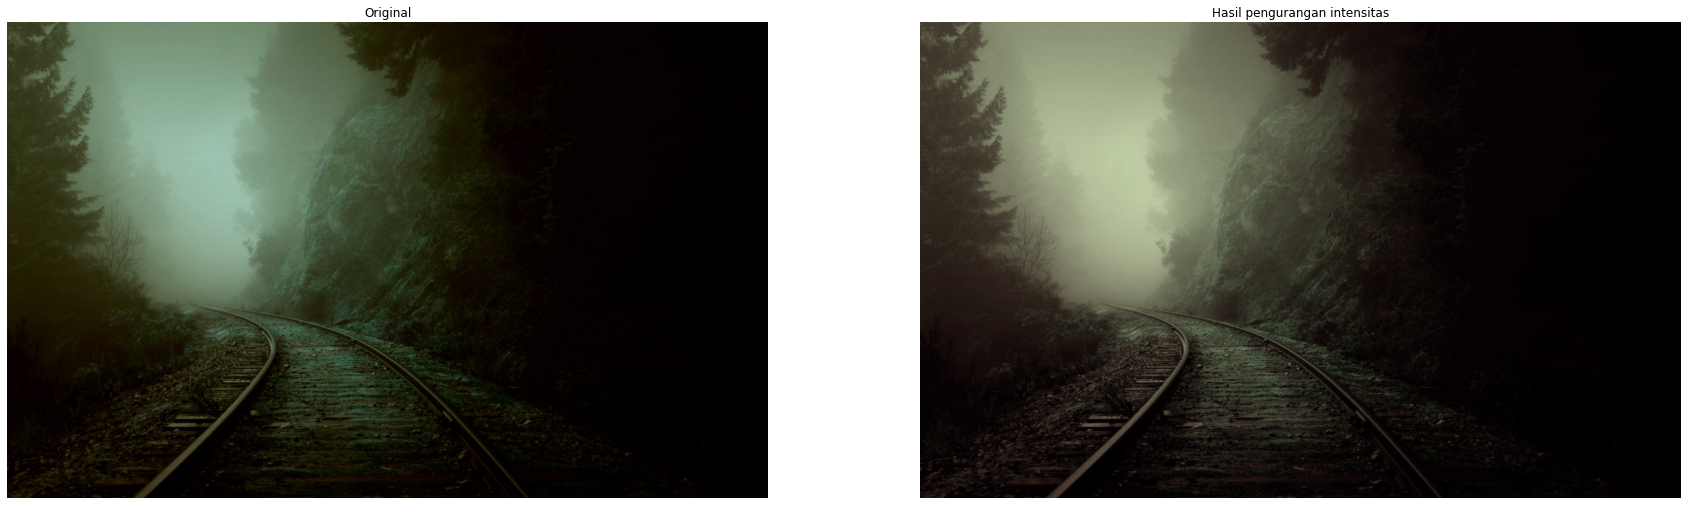

In [12]:
im = Image.open("./nature_dark_forest.jpg")
rgb2xyz = (
    0.312453, 0.257580, 0.380423, 0,
    0.212671, 0.715160, 0.172169, 0,
    0.019334, 0.19193, 0.950227, 0 )
out = im.convert("RGB", rgb2xyz)
coloured = cv2.cvtColor(np.array(out), cv2.COLOR_RGB2BGR)

fig, axes = plt.subplots(1, 3, figsize=(30,20))
plt.subplot(121), plt.imshow(original), plt.axis('off'), plt.title('Original')
plt.subplot(122), plt.imshow(coloured), plt.axis('off'), plt.title('Enhanced')

plt.show()

# Setting brightness dan contrast

Buat fungsi setting gamma.

In [14]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

Adjust Gambar.

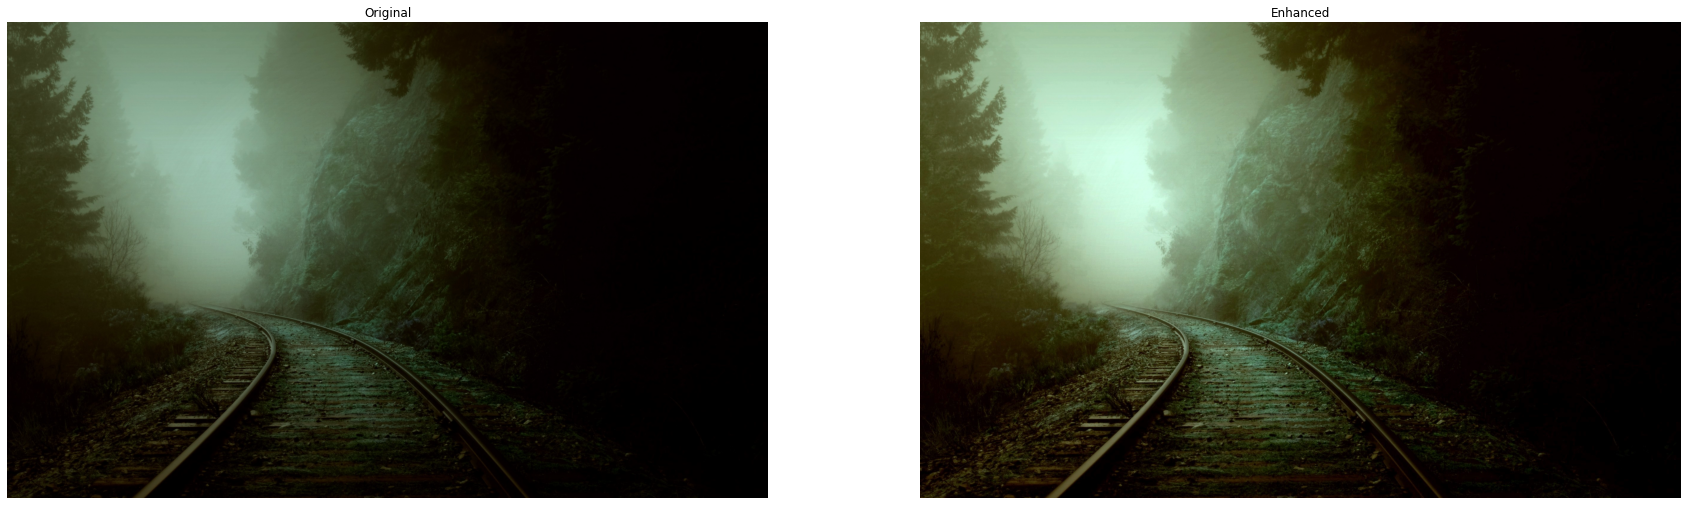

In [15]:
adjusted = adjust_gamma(original, gamma=1.1)
adjusted = cv2.convertScaleAbs(adjusted, alpha=1.3, beta=0)

fig, axes = plt.subplots(1, 3, figsize=(30,20))
plt.subplot(121), plt.imshow(original_const), plt.axis('off'), plt.title('Original')
plt.subplot(122), plt.imshow(adjusted), plt.axis('off'), plt.title('Enhanced')

plt.show()

## Mencoba gambar lain

Load gambar.

In [16]:
img = cv2.imread('./pollen-500x430px-96dpi.jpg',0) # loads in grayscale

Adjust gambar.

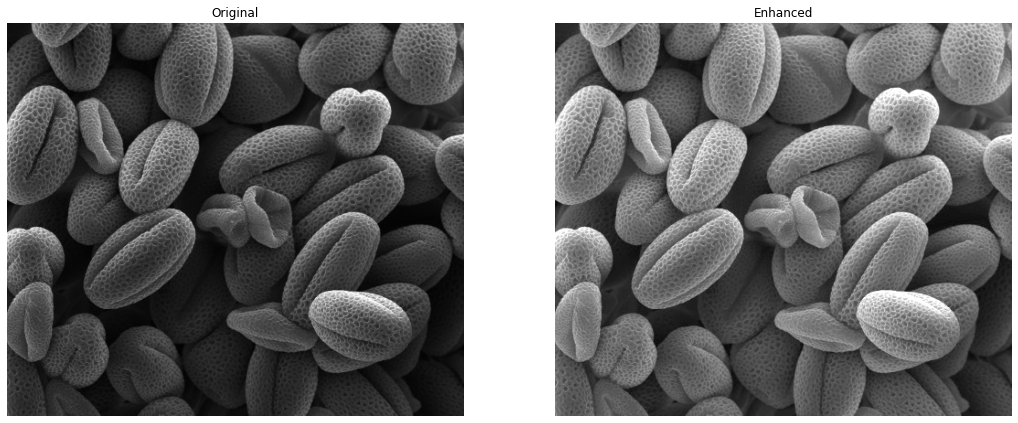

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')

alpha = 1.2
res = cv2.multiply(img, alpha)

adjusted = adjust_gamma(res, gamma=1.5)
plt.subplot(122), plt.imshow(adjusted, cmap='gray'), plt.axis('off'), plt.title('Enhanced')

plt.show()